In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from seaborn import regplot
import matplotlib.pyplot as plt
%matplotlib inline

# VIDEO
## (A)
### Of the estimated 11 million software engineers world wide, how many are estimated to be machine learning engineers?

##### Around 20 to 30 thousand engineers.

## (B)
### Arhsak Navruzyan states that machine learning is interdisciplinary. Describe three of the seven areas that machine learning experts should have a background in.

##### Machine Learning Theory, Bayesian Statistics, and Coding.

## (C) 
### As a rough summary of which machine learning algorithms to apply, Arshak Navruzyan states that for structured data (e.g. data that comes in csv files), ensemble of decision trees works best. What does he say is recommended for unstructured data (e.g. natural language)?

##### Deep Learning

# PROBLEM 1 (Curse of Dimensionality)
#### p 168 #4abcd

## (A)
##### 10%

## (B) 
##### 1%

## (C)
##### 0.1^(100)

# PROBLEM 2 (Logistic Regression for MNIST)
## (A)
### Use logistic regression to predict the digit corresponding to each image in the test set. What are the train and test error rates? Do you believe logistic regression is over-fitting or under-fitting the training data set? Explain.

0


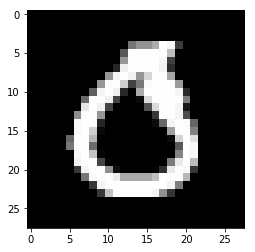

In [3]:
MNIST_train = np.load('./MNIST_train_40000.npz')
MNIST_test  = np.load('./MNIST_test_10000.npz')

ix = 5001
images_train = MNIST_train['train_images']
images_test  = MNIST_test['test_images']
labels_train = MNIST_train['train_labels']
labels_test  = MNIST_test['test_labels']
plt.imshow(images_train[ix,:,:],cmap='Greys_r')
print(labels_train[ix])

In [4]:
features_train = images_train.reshape(40000,28*28)
features_test  = images_test.reshape(10000,28*28)

In [6]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='lbfgs',n_jobs=-1)

In [8]:
from time import time as time
time_start = time()
lgr.fit(features_train,labels_train)
time_stop  = time()
time_elapsed = (time_stop - time_start)/60
print()
print('  training time (min):',round(time_elapsed,1))

time_start = time()
error_train = 1 - lgr.score(features_train,labels_train)
error_test  = 1 - lgr.score(features_test,labels_test)
time_stop  = time()
time_elapsed = (time_stop - time_start)/60
print()
print('prediction time (min):',round(time_elapsed,1))
print()
print('training error rate',error_train.round(2),'  testing error rate',error_test.round(2))

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



  training time (min): 1.0

prediction time (min): 0.0

training error rate 0.07   testing error rate 0.09


##### The test error rate is not bad. Having a higher test error rate than the training error rate is to be expected. This my indicate overfitting, but is inconclusive.

## (B)
### Create a confusion matrix for the test set. Which digits are confused with each other the most?

In [10]:
from sklearn.metrics import confusion_matrix
labels_predicted = lgr.predict(features_test)
M = confusion_matrix(labels_test,labels_predicted)
ConfusionMatrix = pd.DataFrame(M)
ConfusionMatrix['total'] = ConfusionMatrix.sum(axis=1)
ConfusionMatrix

,0,1,2,3,4,5,6,7,8,9,total
0,941,0,5,4,2,8,8,3,5,0,976
1,0,1089,7,3,0,4,2,1,8,1,1115
2,9,9,921,17,17,8,7,9,20,1,1018
3,6,4,21,916,0,30,5,11,13,7,1013
4,3,3,9,0,874,2,8,2,7,32,940
5,11,6,8,39,7,779,26,4,29,8,917
6,10,6,10,1,4,18,953,1,7,0,1010
7,4,8,14,2,5,2,2,960,5,36,1038
8,8,26,13,25,10,31,11,8,839,17,988
9,7,6,3,18,38,6,1,32,11,863,985


##### 2 is confused with 8, 3 is confused with 2 and 5, 4 is confused with 9, 5 is confused with 3, 6, and 8. 9 is confused with 7 and 4

## (C)
### Use the confusion matrix to compute, for the digit 9, the test prediction:
#### (i) precision
#### (ii) recall
#### (iii) F-1 score

In [11]:
precision = 863/(1+1+7+32+8+0+36+17+863)
recall = 863/985
F1_score = 2/(1/precision + 1/recall)
print('precision',round(precision,2))
print('recall   ',round(recall,2))
print('F-1 score',round(F1_score,2))

precision 0.89
recall    0.88
F-1 score 0.89


In [13]:
from sklearn.metrics import classification_report
print(classification_report(labels_test,labels_predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       976
           1       0.94      0.98      0.96      1115
           2       0.91      0.90      0.91      1018
           3       0.89      0.90      0.90      1013
           4       0.91      0.93      0.92       940
           5       0.88      0.85      0.86       917
           6       0.93      0.94      0.94      1010
           7       0.93      0.92      0.93      1038
           8       0.89      0.85      0.87       988
           9       0.89      0.88      0.89       985

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## (D)
### How many records/observations are in the training set? What is the dimension of the feature space, i.e. how many features are there?

In [14]:
features_train.shape

(40000, 784)

##### There are 40,000 features
##### The dimension of the feature space is 784

# PROBLEM 3 (KNN for MNIST)
### Repeat probelm 2(a) except use a KNN classifier (takes *a while* to run).

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)

In [17]:
time_start = time()
knn.fit(features_train,labels_train)
time_stop  = time()
time_elapsed = (time_stop - time_start)/60
print()
print('  training time (min):',round(time_elapsed,1))

time_start = time()
error_train = 1 - knn.score(features_train,labels_train)
error_test  = 1 - knn.score(features_test,labels_test)
time_stop  = time()
time_elapsed = (time_stop - time_start)/60
print()
print('prediction time (min):',round(time_elapsed,1))
print()
print('training error rate',error_train.round(2),'  testing error rate',error_test.round(2))


  training time (min): 0.2

prediction time (min): 3.8

training error rate 0.02   testing error rate 0.03
